In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Diwali_Sales_Data.csv' , encoding = 'unicode_escape')

In [4]:
df.shape

(11251, 15)

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
## Drop unrelated / blank columns

df.drop(['Status' , 'unnamed1'] , axis = 1 , inplace = True) 

In [8]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [11]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [12]:
## Drop null values

df.dropna(inplace=True)

In [13]:
## change the datatypes 

df['Amount'] = df['Amount'].astype('int')

In [14]:
df['Amount'].dtypes

dtype('int32')

In [15]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,11239.0,1.003004e+06,1716.038826,1000001.0,1001491.5,1003064.0,1004426.5,1006040.0
Age,11239.0,3.541036e+01,12.753866,12.0,27.0,33.0,43.0,92.0
Marital_Status,11239.0,4.200552e-01,0.493589,0.0,0.0,0.0,1.0,1.0
Orders,11239.0,2.489634e+00,1.114967,1.0,2.0,2.0,3.0,4.0
Amount,11239.0,9.453611e+03,5222.355168,188.0,5443.0,8109.0,12675.0,23952.0


In [19]:
## Use describe for specific columns

df[['Age' , 'Orders' , 'Amount']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,11239.0,35.410357,12.753866,12.0,27.0,33.0,43.0,92.0
Orders,11239.0,2.489634,1.114967,1.0,2.0,2.0,3.0,4.0
Amount,11239.0,9453.610553,5222.355168,188.0,5443.0,8109.0,12675.0,23952.0


## Exploratory Data Analysis

In [21]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

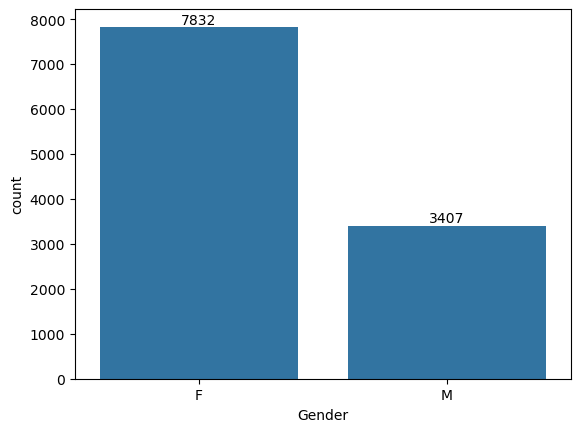

In [22]:
ax = sns.countplot(x = 'Gender' , data = df)
for bars in ax.containers:
    ax.bar_label(bars)

In [29]:
df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

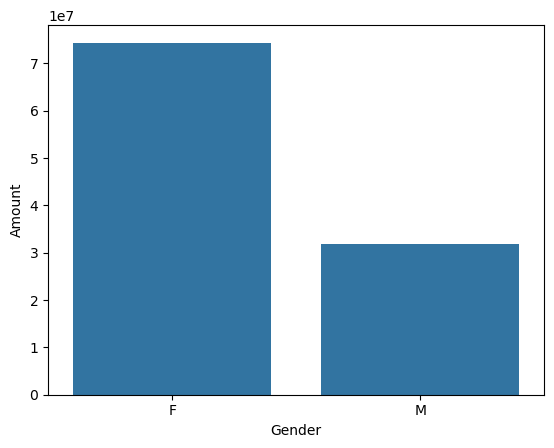

In [31]:
sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False)

sns.barplot(x='Gender' , y = 'Amount' , data = sales_gen )

From above graph we can say that most of the buyers are females and even the purchasing power of females are greater tha men

## Age

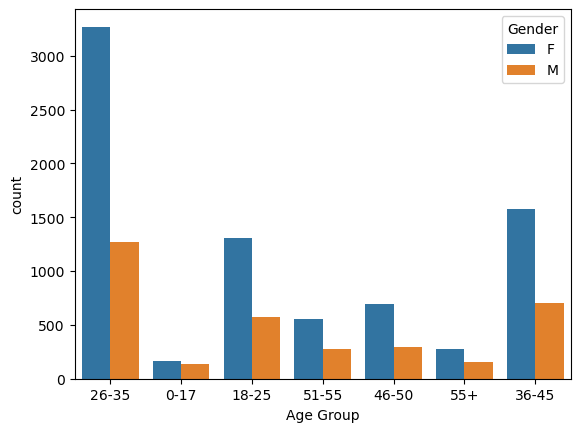

In [32]:
ax = sns.countplot(data = df , x =  'Age Group' , hue = 'Gender')

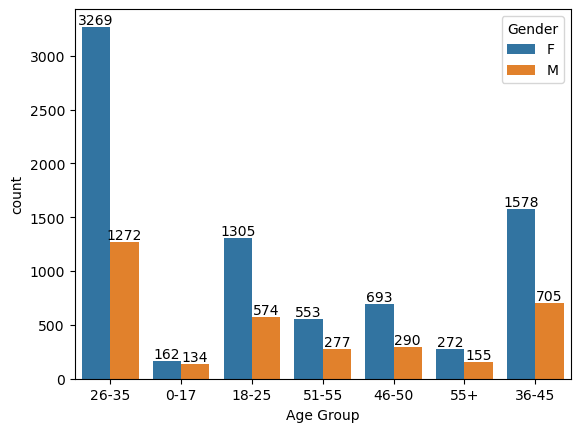

In [33]:
ax = sns.countplot(data = df , x =  'Age Group' , hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

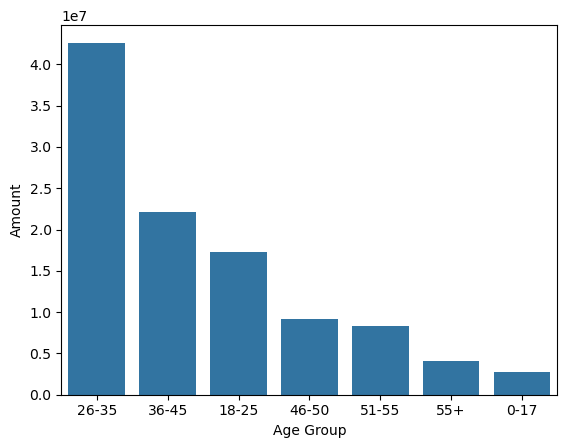

In [34]:
## Total amount vs age group

sales_age = df.groupby(['Age Group'] , as_index=False)['Amount'].sum().sort_values(by='Amount' , ascending = False)
sns.barplot(x = 'Age Group' , y = 'Amount' , data = sales_age)

From above graph we can see that most of the buyers are of age group between 26-35 female

## State

<Axes: xlabel='State', ylabel='Orders'>

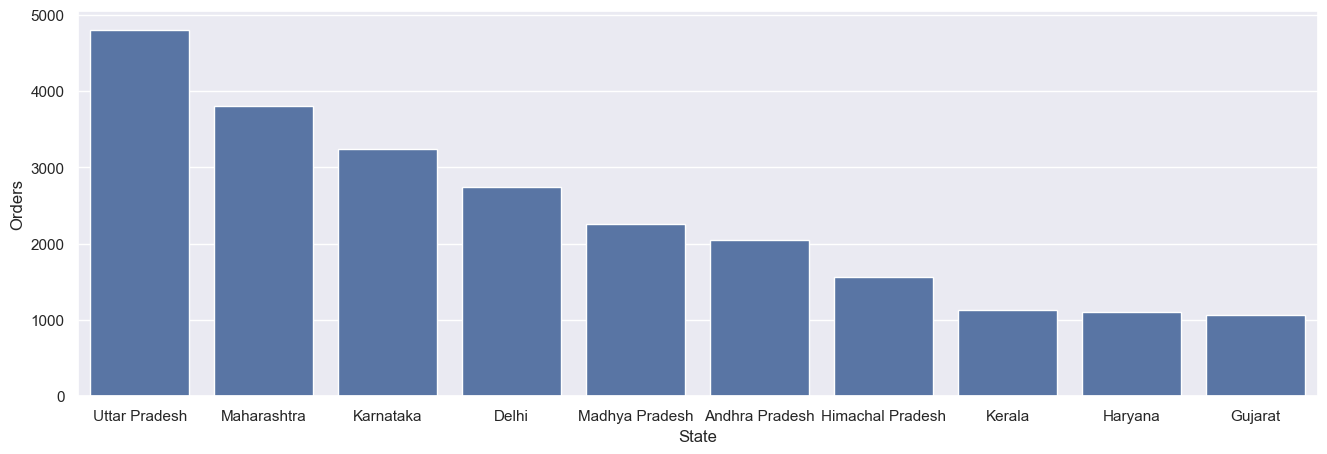

In [38]:
# Total no of orders from top 10 states

sales_state = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data = sales_state , x = 'State' , y = 'Orders')

In [43]:
sales_state_amount = df.groupby(['State'] , as_index=False)['Amount'].sum().sort_values(by='Amount' , ascending = False).head(10)
sales_state_amount

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


<Axes: xlabel='State', ylabel='Amount'>

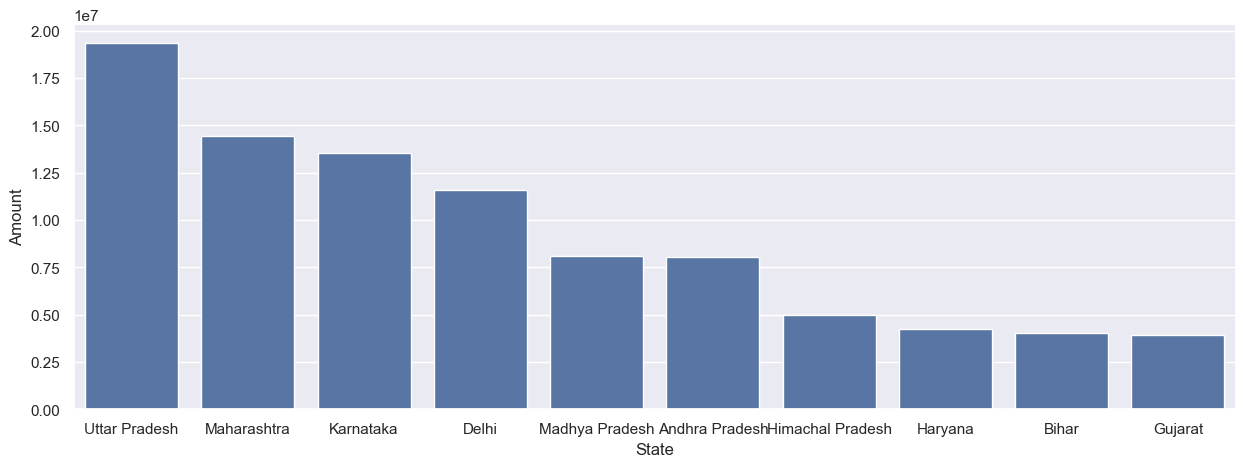

In [41]:
# Total amount/sales from top 10 states

sales_state_amount = df.groupby(['State'] , as_index=False)['Amount'].sum().sort_values(by='Amount' , ascending = False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state_amount , x = 'State' , y = 'Amount')

* From above graphs we can see that most of the total orders and sales are from Uttar Pradesh , Maharashtra , Karnataka *

## Marital Status

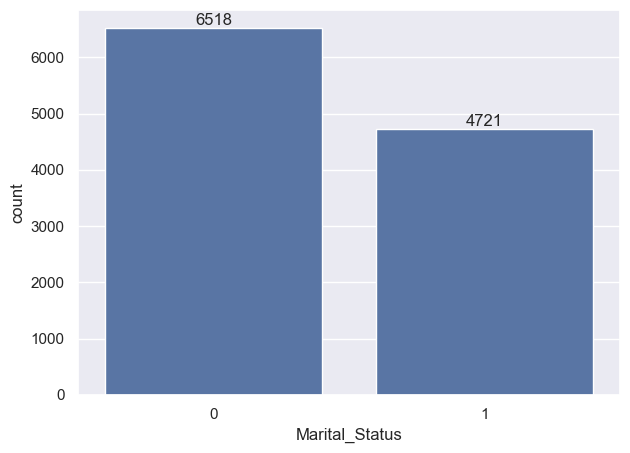

In [49]:
ax = sns.countplot(data = df , x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})


for bars in ax.containers:
    ax.bar_label(bars)

In [50]:
sales_state = df.groupby(['Marital_Status' , 'Gender'] , as_index=False)['Amount'].sum().sort_values(by='Amount' , ascending = False)
sales_state

,Marital_Status,Gender,Amount
0,0,F,43786646
2,1,F,30549207
1,0,M,18338738
3,1,M,13574538


<Axes: xlabel='Marital_Status', ylabel='Amount'>

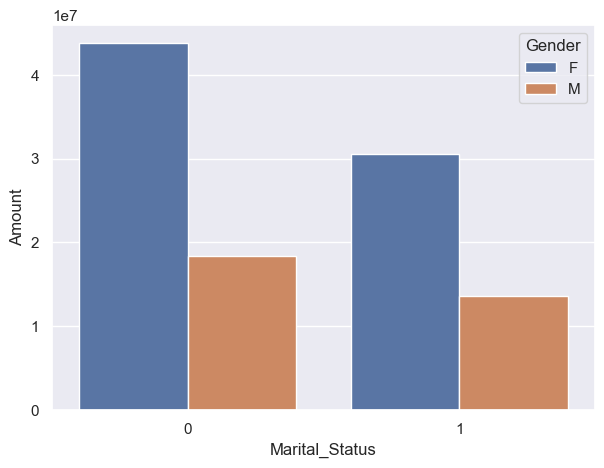

In [51]:
sns.barplot(data = sales_state , x = 'Marital_Status' , y = 'Amount' , hue = 'Gender')

From above graphs we can see that most of the buyers are married(women) and they have high purchasing power

## Occupation

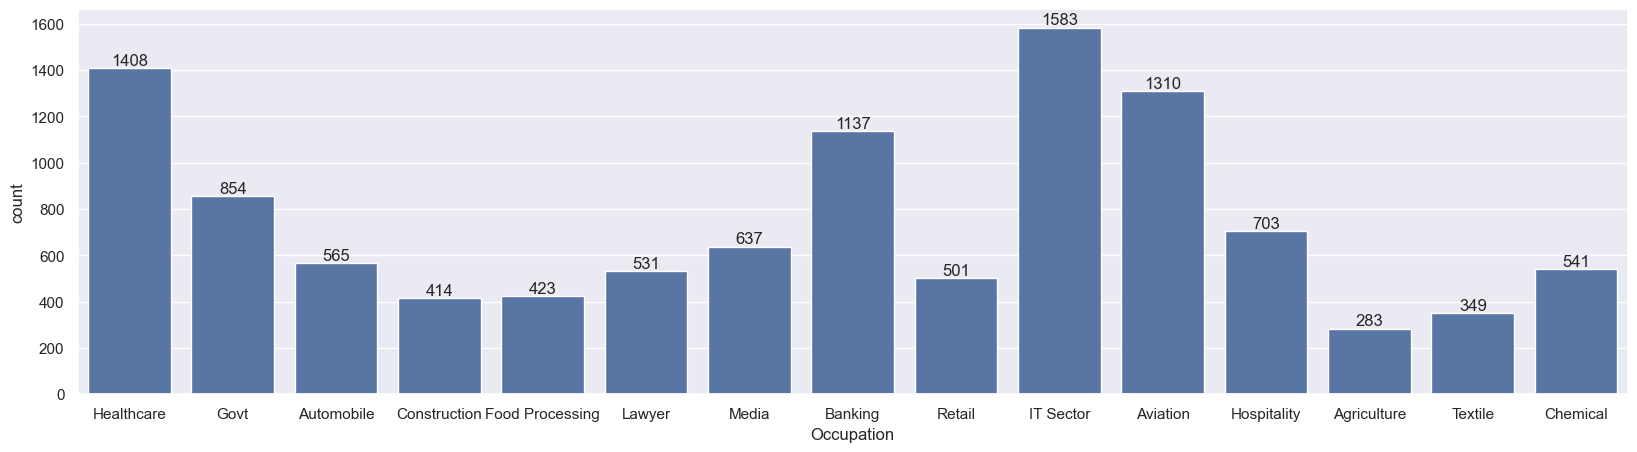

In [52]:
sns.set(rc = {'figure.figsize' : (20,5)})
ax = sns.countplot(data = df , x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

In [54]:
sales_state = df.groupby(['Occupation'] , as_index = False)['Amount'].sum().sort_values(by='Amount' , ascending = False)
sales_state

,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


<Axes: xlabel='Occupation', ylabel='Amount'>

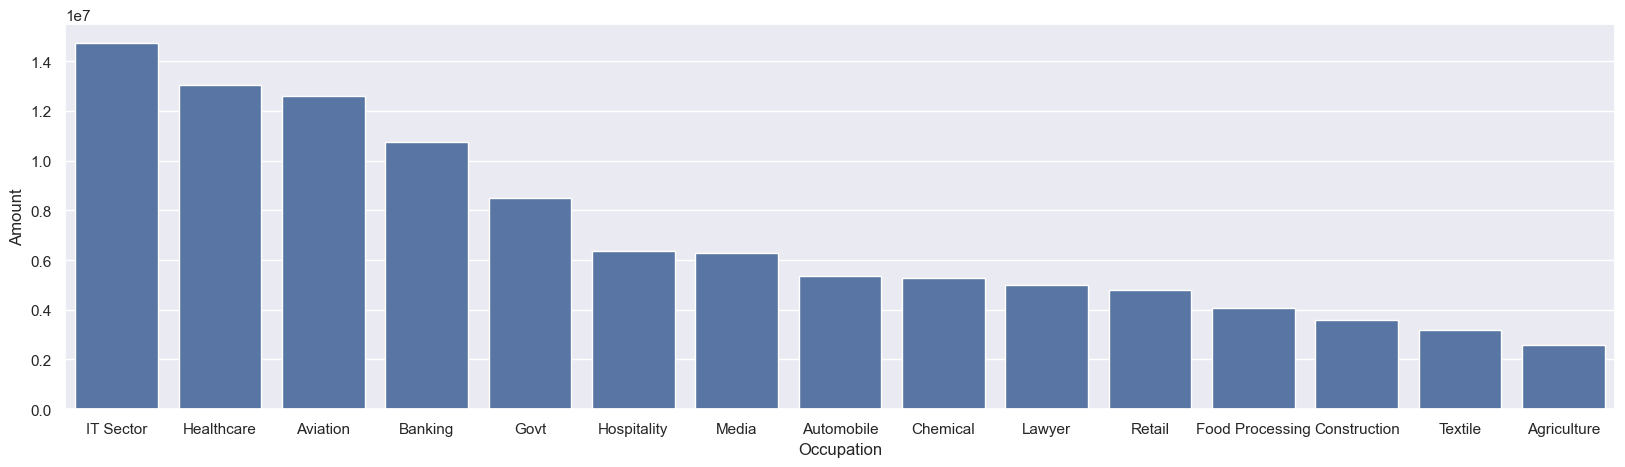

In [55]:
sns.barplot(data = sales_state , x = 'Occupation' , y ='Amount')

From above graphs we can see that most of the buyers are from IT , Healthcar and Aviation sector

## Product Category

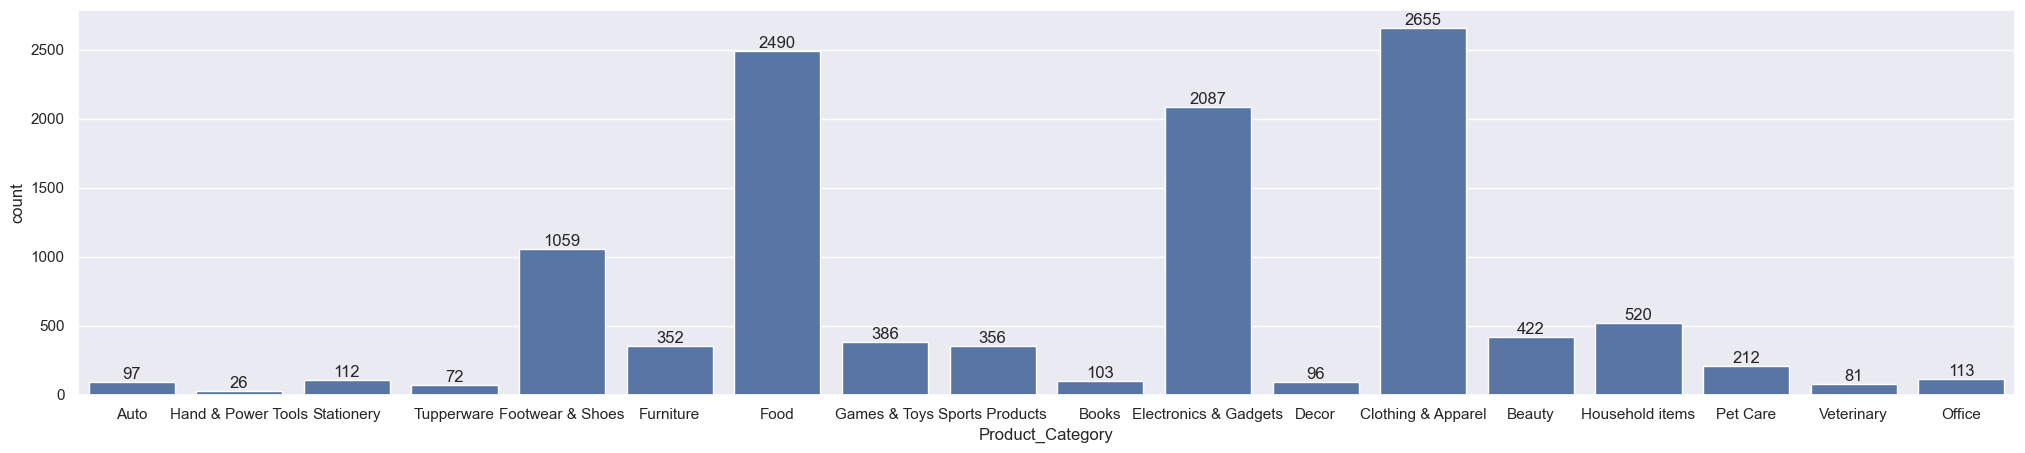

In [60]:
sns.set(rc={'figure.figsize':(25,5)})
ax = sns.countplot(data = df , x = 'Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

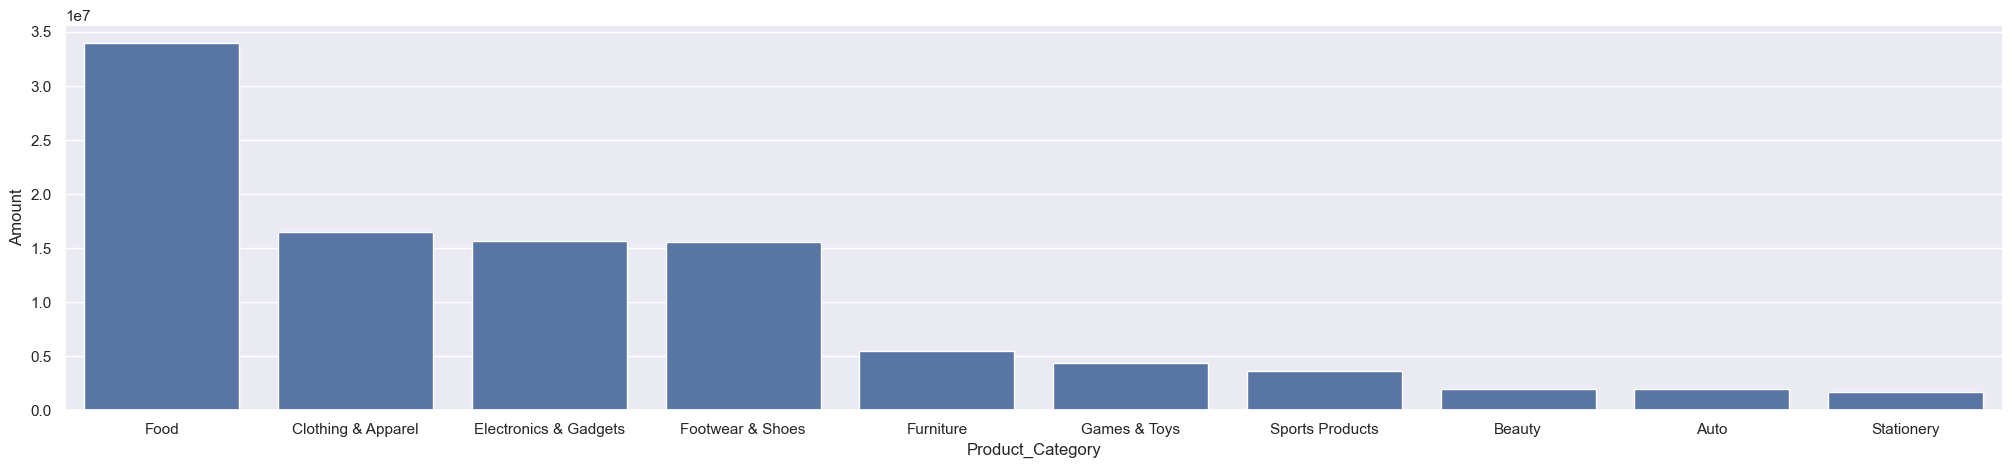

In [62]:
sales_state = df.groupby(['Product_Category'] , as_index = False)['Amount'].sum().sort_values(by='Amount' , ascending = False).head(10)
sns.barplot(data = sales_state , x = 'Product_Category' , y = 'Amount')

From above graphs we can see that most of the sold products are from food , clothing and electronic category

In [64]:
sales_state = df.groupby(['Product_ID'] , as_index = False)['Orders'].sum().sort_values(by='Orders' , ascending = False).head(10)
sales_state

,Product_ID,Orders
1679,P00265242,127
644,P00110942,116
1504,P00237542,91
1146,P00184942,82
679,P00114942,79
171,P00025442,79
708,P00117942,76
888,P00145042,76
298,P00044442,75
643,P00110842,74


<Axes: xlabel='Product_ID', ylabel='Orders'>

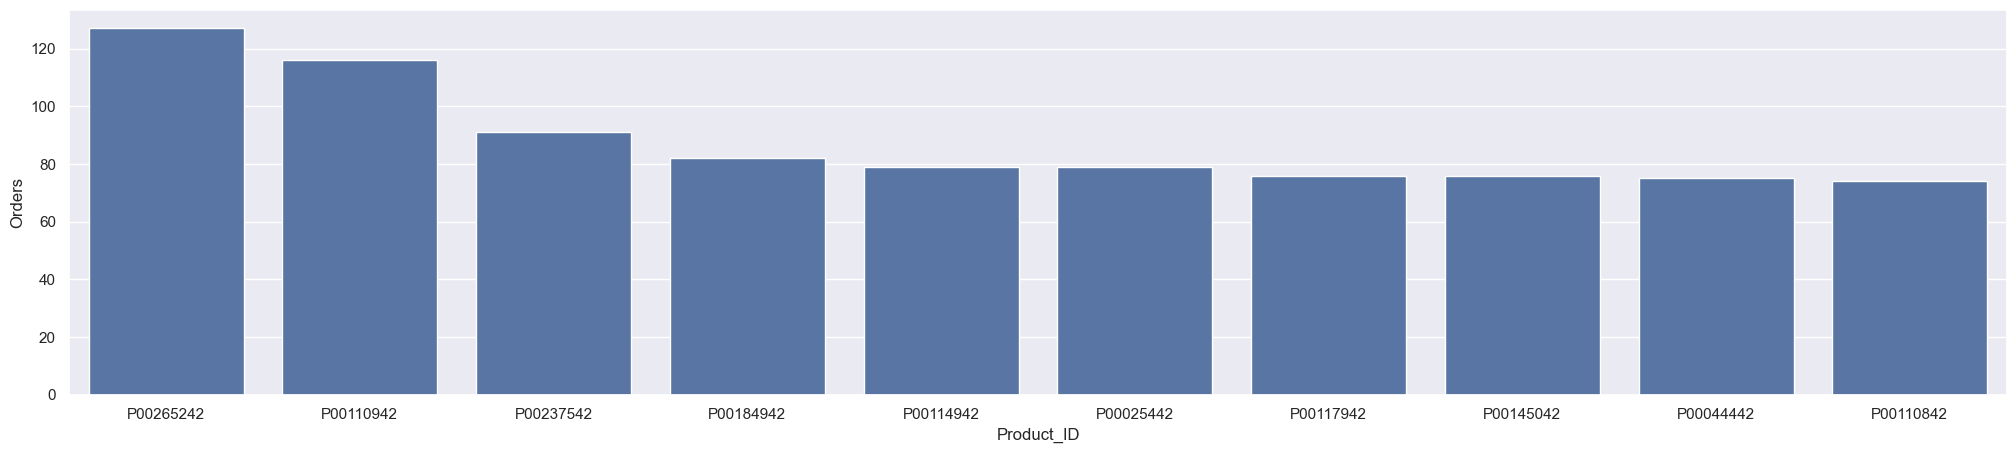

In [66]:
sns.barplot(data= sales_state , x = 'Product_ID' , y = 'Orders')

<Axes: xlabel='Product_ID'>

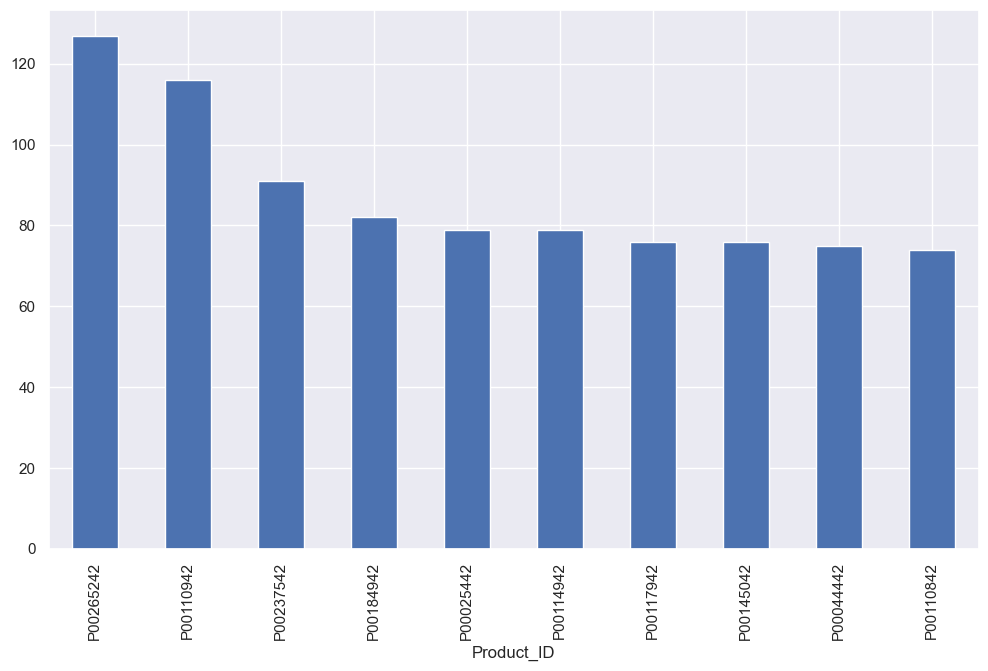

In [67]:
# Top 10 most sold products (same thing as above)

fig1 , ax1 = plt.subplots(figsize = (12,7))
df.groupby(['Product_ID'])['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

## Conclusion

Married women age group 26-35 yrs from UP , Maharashtra and Karnataka working in IT , Healthcare and Aviation sector are more 
likely to buy products from Food , Clothing and Electronic category